<a href="https://colab.research.google.com/github/hamdjalil/ChordDiagram/blob/master/Neuro_PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install brian2

     |████████████████████████████████| 1.5 MB 5.3 MB/s 


# Moris Lecar

In [1]:
from brian2 import *
set_device('cpp_standalone')
defaultclock.dt = 0.01*ms

g_L = 2*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -50*mV
V_Ca = 100*mV
V_K = -70*mV
lambda_n__max = 1.0/(15*ms)
V_1 = 10*mV
V_2 = 15*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = -1*mV
V_4 = 14.5*mV
C = 20*uF
sigma = 0.2*nA*sqrt(1*second)


# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I + sigma*xi)/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
I : amp
'''

neuron = NeuronGroup(4, eqs,threshold='V > -20*mV',refractory='V > -20*mV', method='euler')
neuron.I = (np.arange(4)*25+20)*uA
neuron.V = V_L
neuron.n = 'n_inf'
M = SpikeMonitor(neuron)

run_time = 220*ms
run(run_time)

Text(0.5, 1.0, 'Firing rate Morris Lecar ')

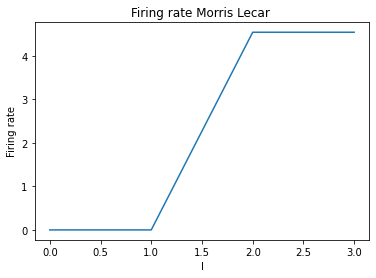

In [2]:
plot(neuron.i, M.count/run_time)
xlabel('I')
ylabel('Firing rate')
title('Firing rate Morris Lecar ')

Text(0.5, 1.0, 'Firing rate Morris Lecar ')

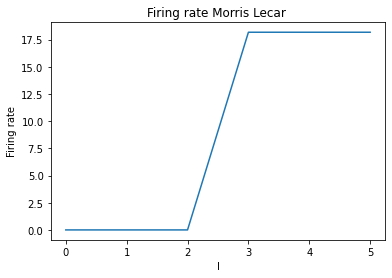

In [1]:
from brian2 import *
set_device('cpp_standalone')
defaultclock.dt = 0.01*ms
#http://www.mashqliu.com/Uploads/file/20190228/2019022813040880880.pdf

g_L = 2*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -60*mV
V_Ca = 120*mV
V_K = -84*mV
lambda_n__max = 1.0/(15*ms)
V_1 = -1.2*mV
V_2 = 18*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = 12*mV
V_4 = 17.4*mV
C = 20*uF
sigma = 200.2*nA*sqrt(1*second)



# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I + sigma*xi)/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
I : amp
'''

neuron = NeuronGroup(6 ,eqs,threshold='V > -20*mV',refractory='V > -20*mV', method='euler')
neuron.I = (np.arange(6)*10+15)*uA
neuron.V = V_L
neuron.n = 'n_inf'
M = SpikeMonitor(neuron)

run_time = 220*ms
run(run_time)

plot(neuron.i, M.count/run_time)
xlabel('I')
ylabel('Firing rate')
title('Firing rate Morris Lecar ')

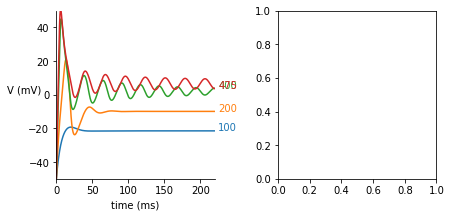

In [1]:
from brian2 import *
set_device('cpp_standalone')
defaultclock.dt = 0.01*ms

g_L = 3*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -50*mV
V_Ca = 100*mV
V_K = -70*mV
lambda_n__max = 1.0/(15*ms)
V_1 = 10*mV
V_2 = 15*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = -1*mV
V_4 = 14.5*mV
C = 20*uF
sigma = 200.2*nA*sqrt(1*second)



# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs2 = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I)/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
I : amp
'''


neuron2 = NeuronGroup(17, eqs2, method='euler')
neuron2.I = (np.arange(17)*25+100)*uA
neuron2.V = V_L
neuron2.n = 'n_inf'
mon = StateMonitor(neuron2, ['V', 'n'], record=True)

run_time = 220*ms
run(run_time)
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'right': 0.95, 'bottom': 0.15},
                               figsize=(6.4, 3.2))
fig.subplots_adjust(wspace=0.4)
for line_no, idx in enumerate([0, 4, 12, 15]):
    color = 'C%d' % line_no
    ax1.plot(mon.t/ms, mon.V[idx]/mV, color=color)
    ax1.text(225, mon.V[idx][-1]/mV, '%.0f' % (neuron2.I[idx]/uA), color=color)
ax1.set(xlim=(0, 220), ylim=(-50, 50), xlabel='time (ms)')
ax1.set_ylabel('V (mV)', rotation=0)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

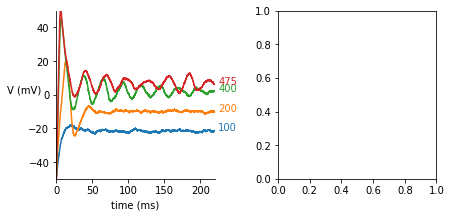

In [ ]:
from brian2 import *
set_device('cpp_standalone')
defaultclock.dt = 0.01*ms

g_L = 3*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -50*mV
V_Ca = 100*mV
V_K = -70*mV
lambda_n__max = 1.0/(15*ms)
V_1 = 10*mV
V_2 = 15*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = -1*mV
V_4 = 14.5*mV
C = 20*uF
sigma = 200.2*nA*sqrt(1*second)



# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs2 = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I + sigma*xi)/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
I : amp
'''


neuron2 = NeuronGroup(17, eqs2, method='euler')
neuron2.I = (np.arange(17)*25+100)*uA
neuron2.V = V_L
neuron2.n = 'n_inf'
mon = StateMonitor(neuron2, ['V', 'n'], record=True)

run_time = 220*ms
run(run_time)
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'right': 0.95, 'bottom': 0.15},
                               figsize=(6.4, 3.2))
fig.subplots_adjust(wspace=0.4)
for line_no, idx in enumerate([0, 4, 12, 15]):
    color = 'C%d' % line_no
    ax1.plot(mon.t/ms, mon.V[idx]/mV, color=color)
    ax1.text(225, mon.V[idx][-1]/mV, '%.0f' % (neuron2.I[idx]/uA), color=color)
ax1.set(xlim=(0, 220), ylim=(-50, 50), xlabel='time (ms)')
ax1.set_ylabel('V (mV)', rotation=0)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

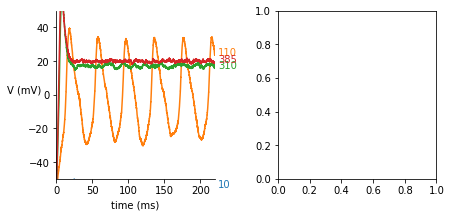

In [1]:
from brian2 import *
set_device('cpp_standalone')
defaultclock.dt = 0.01*ms

g_L = 2*mS
g_Ca = 4*mS
g_K = 8*mS
V_L = -60*mV
V_Ca = 120*mV
V_K = -84*mV
lambda_n__max = 1.0/(15*ms)
V_1 = -1.2*mV
V_2 = 18*mV  # Note that Figure caption says -15 which seems to be a typo
V_3 = 12*mV
V_4 = 17.4*mV
C = 20*uF
sigma = 400.2*nA*sqrt(1*second)




# V,N-reduced system (Eq. 9 in article), note that the variables M and N (and lambda_N, etc.)
# have been renamed to m and n to better match the Hodgkin-Huxley convention, and because N has
# a reserved meaning in Brian (number of neurons)
eqs2 = '''
dV/dt = (-g_L*(V - V_L) - g_Ca*m_inf*(V - V_Ca) - g_K*n*(V - V_K) + I + sigma*xi)/C : volt
dn/dt = lambda_n*(n_inf - n) : 1
m_inf = 0.5*(1 + tanh((V - V_1)/V_2)) : 1
n_inf = 0.5*(1 + tanh((V - V_3)/V_4)) : 1
lambda_n = lambda_n__max*cosh((V - V_3)/(2*V_4)) : Hz
I : amp
'''

neuron2 = NeuronGroup(17, eqs2, method='euler')
neuron2.I = (np.arange(17)*25+10)*uA#make this between 50 and 200, step of 10
neuron2.V = V_L
neuron2.n = 'n_inf'
mon = StateMonitor(neuron2, ['V', 'n'], record=True)

run_time = 220*ms
run(run_time)
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'right': 0.95, 'bottom': 0.15},
                               figsize=(6.4, 3.2))
fig.subplots_adjust(wspace=0.4)
for line_no, idx in enumerate([0, 4, 12, 15]):
    color = 'C%d' % line_no
    ax1.plot(mon.t/ms, mon.V[idx]/mV, color=color)
    ax1.text(225, mon.V[idx][-1]/mV, '%.0f' % (neuron2.I[idx]/uA), color=color)
ax1.set(xlim=(0, 220), ylim=(-50, 50), xlabel='time (ms)')
ax1.set_ylabel('V (mV)', rotation=0)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

## Hudgkin-Huxley

In [2]:
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV
sigma = 400.2*nA*sqrt(1*second)


# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I + sigma*xi )/Cm : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='euler')
group.v = El
group.I = '0.7*nA * i / num_neurons'

monitor = SpikeMonitor(group)

run(duration)

plot(group.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
show()

BrianObjectException: ignored

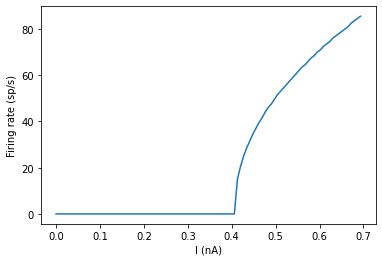

In [ ]:
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 0.0003*siemens*cm**-2 * area
El = -65*mV
EK = -77*mV
ENa = 55*mV
g_na = 40*msiemens*cm**-2 * area
g_kd = 35*msiemens*cm**-2 * area
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = El
group.I = '0.7*nA * i / num_neurons'

monitor = SpikeMonitor(group)

run(duration)

plot(group.I/nA, monitor.count / duration)
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
show()

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in 3s
Starting simulation at t=53. ms for a duration of 50. ms
50. ms (100%) simulated in 3s
Velocity = 12.33 m/s


Text(0, 0.5, 'v')

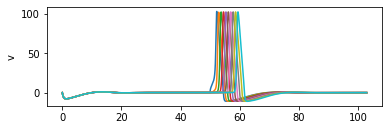

In [ ]:
from brian2 import *
from scipy import stats

defaultclock.dt = 0.01*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0
M = StateMonitor(neuron, 'v', record=True)
spikes = SpikeMonitor(neuron)

run(50*ms, report='text')
neuron.I[0] = 1*uA # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(50*ms, report='text')

# Calculation of velocity
slope, intercept, r_value, p_value, std_err = stats.linregress(spikes.t/second,
                                                neuron.distance[spikes.i]/meter)
print("Velocity = %.2f m/s" % slope)

subplot(211)
for i in range(10):
    plot(M.t/ms, M.v.T[:, i*100]/mV)
ylabel('v')

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in 3s
Starting simulation at t=53. ms for a duration of 50. ms
50. ms (100%) simulated in 4s


Text(0, 0.5, 'v')

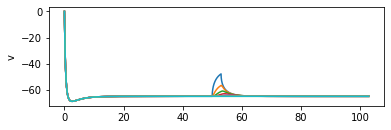

In [1]:
from brian2 import *
from scipy import stats

defaultclock.dt = 0.01*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')


El = -65*mV
ENa = 55*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 40*msiemens/cm**2
gK = 35*msiemens/cm**2


# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0
M = StateMonitor(neuron, 'v', record=True)
spikes = SpikeMonitor(neuron)

run(50*ms, report='text')
neuron.I[0] = 1*uA # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(50*ms, report='text')

# Calculation of velocity

subplot(211)
for i in range(10):
    plot(M.t/ms, M.v.T[:, i*60]/mV)
ylabel('v')

# Hindmarsh rose

Starting simulation at t=0. s for a duration of 200. ms


WARNING    neurongroup_3's variable 'y' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_3's variable 'z' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_3's variable 'x' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


200. ms (100%) simulated in < 1s


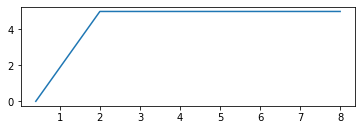

In [4]:
from brian2 import *

# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
defaultclock.dt = time_unit/10

x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 3; c = 1; d = 5
r = 0.001; s = 4
sigma = 400.2*sqrt(1*second)

eqs = '''
dx/dt = (y - a*x**3 + b*x**2 + I + sigma*xi - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
I : 1 (constant)
'''

# We run the model with three different currents
neuron = NeuronGroup(3, eqs,threshold='I > 1',
                    refractory='I > 0',
                    method='euler')

# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'

# Set the constant current input
neuron.I = [0.4,2,8]

S = SpikeMonitor(neuron)

run(200*ms, report='text')

subplot(211)  # The input
plot(neuron.I, S.count/(200*ms))

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in < 1s


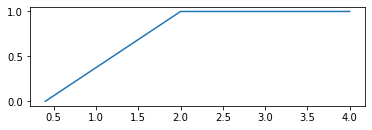

In [ ]:
from brian2 import *
#https://www.researchgate.net/publication/275673221_Memristor_A_New_Concept_in_Synchronization_of_Coupled_Neuromorphic_Circuits

# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
defaultclock.dt = time_unit/10

x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 2.82; c = 1; d = 5
r = 0.002; s = 4
eqs = '''
dx/dt = (y - a*x**3 + b*x**2 + I - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
I : 1 (constant)
'''

# We run the model with three different currents
neuron = NeuronGroup(3, eqs,threshold='I > 1',
                    refractory='I > 0',
                    method='euler')

# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'

# Set the constant current input
neuron.I = [0.4, 2, 4] #input between 0.5 and 1.5
S = SpikeMonitor(neuron)

run(1000*ms, report='text')

subplot(211)  # The input
plot(neuron.I, S.count/(1000*ms))

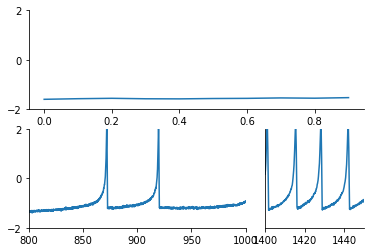

In [5]:
from brian2 import *

# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
defaultclock.dt = time_unit/10


x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 3; c = 1; d = 5
r = 0.001; s = 4
sigma = 0.002*sqrt(1*second)

eqs = '''
dx/dt = (y - a*x**3 + b*x**2 + I + sigma*xi - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
I : 1 (constant)
'''

# We run the model with three different currents
neuron = NeuronGroup(3, eqs, method='euler')

# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'

# Set the constant current input
neuron.I = [0.4,2,4]

# Record the "membrane potential"
mon = StateMonitor(neuron, 'x', record=True)

run(2100*time_unit)

ax_top = plt.subplot2grid((2, 3), (0, 0), colspan=3)
ax_bottom_l = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax_bottom_r = plt.subplot2grid((2, 3), (1, 2))
for ax in [ax_top, ax_bottom_l, ax_bottom_r]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(ylim=(-2, 2), yticks=[-2, 0, 2])



ax_top.plot(mon.t[0:10]/time_unit, mon.x[0][0:10])

ax_bottom_l.plot(mon.t/time_unit, mon.x[1])
ax_bottom_l.set_xlim(800, 1000)

ax_bottom_r.plot(mon.t/time_unit, mon.x[2])
ax_bottom_r.set_xlim(1400, 1450)
ax_bottom_r.set_yticks([])

plt.show()
#bursty neuron

In [4]:
print(len(mon.x[0]))

21000


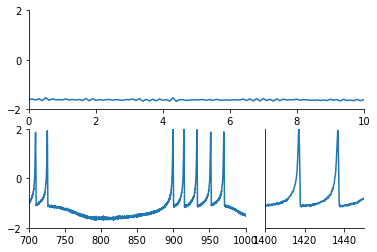

In [5]:
from brian2 import *

# In the original model, time is measured in arbitrary time units
time_unit = 1*ms
defaultclock.dt = time_unit/10

x_1 = -1.6  # leftmost equilibrium point of the model without adaptation
a = 1; b = 2.82; c = 1; d = 5
r = 0.002; s = 4
sigma = 0.002*sqrt(1*second)

eqs = '''
dx/dt = (y - a*x**3 + b*x**2 + I + sigma*xi - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
I : 1 (constant)
'''

# We run the model with three different currents
neuron = NeuronGroup(3, eqs, method='euler')

# Set all variables to their equilibrium point
neuron.x = x_1
neuron.y = 'c - d*x**2'
neuron.z = 'r*(s*(x - x_1))'

# Set the constant current input
neuron.I = [0.4, 2, 4]

# Record the "membrane potential"
mon = StateMonitor(neuron, 'x', record=True)

run(2100*time_unit)

ax_top = plt.subplot2grid((2, 3), (0, 0), colspan=3)
ax_bottom_l = plt.subplot2grid((2, 3), (1, 0), colspan=2)
ax_bottom_r = plt.subplot2grid((2, 3), (1, 2))
for ax in [ax_top, ax_bottom_l, ax_bottom_r]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set(ylim=(-2, 2), yticks=[-2, 0, 2])

ax_top.plot(mon.t/time_unit, mon.x[0])
ax_top.set_xlim(0, 10)


ax_bottom_l.plot(mon.t/time_unit, mon.x[1])
ax_bottom_l.set_xlim(700, 1000)

ax_bottom_r.plot(mon.t/time_unit, mon.x[2])
ax_bottom_r.set_xlim(1400, 1450)
ax_bottom_r.set_yticks([])

plt.show()
#stronger input required

# Brete Gerstener

WARNING    'vm' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value array([-70.6       , -67.60690974, -71.86859205, ..., -54.34992856,
       -45.4933216 ,  20.        ]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


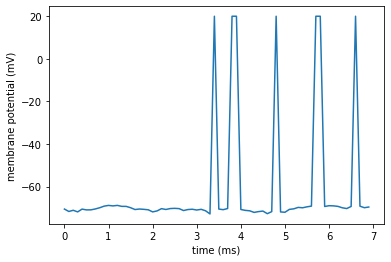

In [9]:
from brian2 import *

# Parameters
C = 281 * pF
gL = 30 * nS
taum = C / gL
EL = -70.6 * mV
VT = -50.4 * mV
DeltaT = 2 * mV
Vcut = VT + 5 * DeltaT
sigma = 0.02*nA*sqrt(1*second)




# Pick an electrophysiological behaviour
tauw, a, b, Vr = 144*ms, 4*nS, 0.0805*nA, -70.6*mV # Regular spiking (as in the paper)
#tauw,a,b,Vr=20*ms,4*nS,0.5*nA,VT+5*mV # Bursting
#tauw,a,b,Vr=144*ms,2*C/(144*ms),0*nA,-70.6*mV # Fast spiking

eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I + sigma*xi  - w)/C : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I : amp
"""

neuron = NeuronGroup(10, model=eqs, threshold='vm>Vcut',
                     reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL
trace = StateMonitor(neuron, 'vm', record=0)
spikes = SpikeMonitor(neuron)

run(2 * ms)
neuron.I = [0.2*nA,0.5*nA,0.8*nA,1*nA, 2*nA,2.5*nA,3*nA,3.5*nA,4*nA,4.5*nA]
run(5 * ms)


# We draw nicer spikes
vm = trace[0].vm[:]
for t in spikes.t:
    i = int(t / defaultclock.dt)
    vm[i] = 20*mV

plot(trace.t / ms, vm / mV)
xlabel('time (ms)')
ylabel('membrane potential (mV)')
show()
#reduce mean input
#plot only one

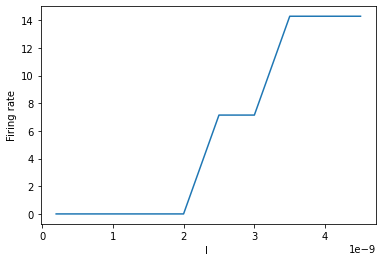

In [10]:
plot(neuron.I, spikes.count/(140*ms))
xlabel('I ')
ylabel('Firing rate')
show()
#0.1nA to 0.5nA

WARNING    'vm' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([-70.6       , -71.73036318, -71.17320052, ..., -69.24500831,
       -69.96126735, -69.64074076]) * mvolt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


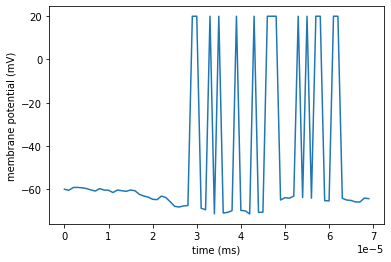

In [11]:
from brian2 import *
#https://www.sciencedirect.com/science/article/pii/S0378437118300724

# Parameters
C = 200 * pF
gL = 9 * nS
taum = C / gL
EL = -60 * mV
VT = -50 * mV
DeltaT = 2 * mV
Vcut = VT + 5 * DeltaT
sigma = 0.02*nA*sqrt(1*second)


# Pick an electrophysiological behaviour
tauw, a, b, Vr = 600*ms, 2*nS, 0.0805*nA, -70.6*mV # Regular spiking (as in the paper)
#tauw,a,b,Vr=20*ms,4*nS,0.5*nA,VT+5*mV # Bursting
#tauw,a,b,Vr=144*ms,2*C/(144*ms),0*nA,-70.6*mV # Fast spiking

eqs = """
dvm/dt = (gL*(EL - vm) + gL*DeltaT*exp((vm - VT)/DeltaT) + I + sigma*xi  - w)/C : volt
dw/dt = (a*(vm - EL) - w)/tauw : amp
I : amp
"""

neuron = NeuronGroup(13, model=eqs, threshold='vm>Vcut',
                     reset="vm=Vr; w+=b", method='euler')
neuron.vm = EL
trace = StateMonitor(neuron, 'vm', record=0)
spikes = SpikeMonitor(neuron)

run(2 * ms)
neuron.I = [0.001*nA,0.05*nA,0.1*nA,0.2*nA,0.5*nA,0.8*nA,1*nA, 2*nA,2.5*nA,3*nA,3.5*nA,4*nA,4.5*nA]
run(5 * ms)


# We draw nicer spikes
vm = trace[0].vm[:]
for t in spikes.t:
    i = int(t / defaultclock.dt)
    vm[i] = 20*mV

plot(trace.t / 0.1*ms, vm / mV)
xlabel('time (ms)')
ylabel('membrane potential (mV)')
show()

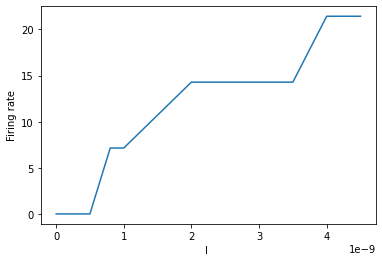

In [12]:
plot(neuron.I, spikes.count/(140*ms))
xlabel('I ')
ylabel('Firing rate')
show()